In [146]:
# Импортируем необходимые библиотеки для работы с датасетом.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary


In [145]:
!pip install tensorflow

In [108]:
# Загружаем данные, удаляем столбец "Date",  а также те столбцы, значения NAN которых 
# составляют более 30% всех значений в этих столбцах.
# выводим таблицу с данными.
df = pd.read_csv('../Проект_25_05_21/weatherAUS.csv')
df.drop('Date', inplace=True, axis=1)
df.drop('Evaporation', inplace=True, axis=1)
df.drop('Sunshine', inplace=True, axis=1)
df.drop('Cloud9am', inplace=True, axis=1)
df.drop('Cloud3pm', inplace=True, axis=1)
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


In [109]:
# Проверяем, какие столбцы содержат числовые данные, какие - категориальные.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      142199 non-null  object 
 17  RainTomorrow   142193 non-nul

In [110]:
# Изменяем категориальные значения в столбце "RainTomorrow" на числовые, удаляем строки, 
# которые содержат значения NAN в столбце RainTomorrow.
# выводим таблицу с данными.
df['RainTomorrow'].replace("No", 0, inplace=True)
df['RainTomorrow'].replace("Yes", 1, inplace=True) 
df.dropna(subset=['RainTomorrow'], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0.0
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0.0
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0.0
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,0.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      140787 non-null  object 
 17  RainTomorrow   142193 non-nul

In [112]:
# Цикл, который выводит таблицу со столбцами, у которых значения типа "object" 
# изменяются на числовые значения 0 и 1.
object_columns = list(df.select_dtypes("object").columns)
object_columns
df_2 = pd.DataFrame()
for column in object_columns:
    df_2 = pd.concat([df_2, pd.get_dummies(df[column], prefix=column)], axis=1)
df_2

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [113]:
# Создаем новый датафрейм, объединяя исходный датафрейм с новым. 
df_3 = pd.concat([df.select_dtypes(exclude='object'), df_2], axis=1)

df_3

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,1,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,1,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,1,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,1,0,1,0


In [114]:
# Данный датафрейм содержит значения для обучения. Удаляем из него столбец 'RainTomorrow', 
# так как это наша целевая переменная, которую мы будем предсказывать.
df_3.drop('RainTomorrow', inplace=True, axis=1)
df_3.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,1,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,1,0,0,1,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,1,0,0,1,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,0,1,0,0,1,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,0,0,0,0,0,1,0
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,1,0,0,0,0,0,0,1


In [124]:
df_3.iloc[:, :20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MinTemp                 142193 non-null  float64
 1   MaxTemp                 142193 non-null  float64
 2   Rainfall                142193 non-null  float64
 3   WindGustSpeed           142193 non-null  float64
 4   WindSpeed9am            142193 non-null  float64
 5   WindSpeed3pm            142193 non-null  float64
 6   Humidity9am             142193 non-null  float64
 7   Humidity3pm             142193 non-null  float64
 8   Pressure9am             142193 non-null  float64
 9   Pressure3pm             142193 non-null  float64
 10  Temp9am                 142193 non-null  float64
 11  Temp3pm                 142193 non-null  float64
 12  Location_Adelaide       142193 non-null  uint8  
 13  Location_Albany         142193 non-null  uint8  
 14  Location_Albury     

In [122]:
# Изменяем все значения Nan в столбцах, которые содержат числовые данные, на среднее значения по всем столбцам.
df_3['MinTemp'].fillna(df_3['MinTemp'].mean(), inplace=True)
df_3['MaxTemp'].fillna(df_3['MaxTemp'].mean(), inplace=True)
df_3['Rainfall'].fillna(df_3['Rainfall'].mean(), inplace=True)
df_3['WindGustSpeed'].fillna(df_3['WindGustSpeed'].mean(), inplace=True)
df_3['WindSpeed9am'].fillna(df_3['WindSpeed9am'].mean(), inplace=True)
df_3['WindSpeed3pm'].fillna(df_3['WindSpeed3pm'].mean(), inplace=True)
df_3['Humidity9am'].fillna(df_3['Humidity9am'].mean(), inplace=True)
df_3['Humidity3pm'].fillna(df_3['Humidity3pm'].mean(), inplace=True)
df_3['Pressure9am'].fillna(df_3['Pressure9am'].mean(), inplace=True)
df_3['Pressure3pm'].fillna(df_3['Pressure3pm'].mean(), inplace=True)
df_3['Temp9am'].fillna(df_3['Temp9am'].mean(), inplace=True)
df_3['Temp3pm'].fillna(df_3['Temp3pm'].mean(), inplace=True)
df_3

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,1,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,1,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,1,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,1,0,1,0


In [177]:
# задаем целевую переменную. Указываем х и y. 
target = 'RainTomorrow'
x = df_3.to_numpy()
y = df[target].to_numpy()
x.shape, y.shape

((142193, 111), (142193,))

In [178]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((106644, 111), (35549, 111), (106644,), (35549,))

In [179]:
# Нормируем данные при помощи StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((106644, 111), (35549, 111))

In [253]:
input_shape = x_train_norm.shape[1]
input_shape

111

In [258]:
# Применение алгоритма keras.Sequential для создания нейронных сетей.
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               11200     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 101       
Total params: 21,401
Trainable params: 21,401
Non-trainable params: 0
_________________________________________________________________


In [259]:
model.compile(
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()],
    optimizer=keras.optimizers.Adam(lr=0.01, amsgrad=True)
)



In [260]:
# обучение на тренировочной выборке.
history = model.fit(x_train_norm, 
                    y_train, 
                    batch_size=10000, 
                    epochs=50, 
                    validation_data=(x_valid_norm, y_valid), 
                    verbose=1)

Train on 106644 samples, validate on 35549 samples
Epoch 1/50
106644/106644 [==============================] - 2s 17us/sample - loss: 0.5771 - auc_5: 0.6461 - val_loss: 0.4383 - val_auc_5: 0.8268
Epoch 2/50
106644/106644 [==============================] - 1s 8us/sample - loss: 0.4069 - auc_5: 0.8240 - val_loss: 0.3882 - val_auc_5: 0.8482
Epoch 3/50
106644/106644 [==============================] - 1s 8us/sample - loss: 0.3733 - auc_5: 0.8553 - val_loss: 0.3622 - val_auc_5: 0.8655
Epoch 4/50
106644/106644 [==============================] - 1s 8us/sample - loss: 0.3508 - auc_5: 0.8741 - val_loss: 0.3455 - val_auc_5: 0.8759
Epoch 5/50
106644/106644 [==============================] - 1s 8us/sample - loss: 0.3376 - auc_5: 0.8831 - val_loss: 0.3379 - val_auc_5: 0.8810
Epoch 6/50
106644/106644 [==============================] - 1s 8us/sample - loss: 0.3298 - auc_5: 0.8886 - val_loss: 0.3341 - val_auc_5: 0.8835
Epoch 7/50
106644/106644 [==============================] - 1s 8us/sample - loss: 0.

Text(0.5, 1.0, 'Loss')

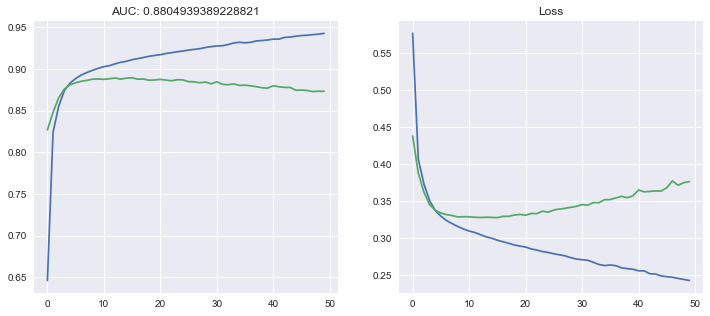

In [262]:
# выводим график с результатом 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['auc_5'])
ax1.plot(history.history['val_auc_5'])
ax1.set_title(f"AUC: {np.mean(history.history['val_auc_5'])}")

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')